In [2]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

from matplotlib import pyplot as plt

# can be installed using 
# pip install metapredict
# for docs see https://metapredict.readthedocs.io/
import metapredict as meta



## Read in and parse performance data

In [3]:
with open('data/CAID_total_dataset_cpu_time.tsv') as fh:
    content = fh.readlines()
performance = {}
for line in content[1:]:
    sline = line.strip().split()
    if sline[2] == 'disorder':
        performance[sline[0]] = float(sline[1])    

## Read in and parse accuracy data

In [4]:
accuracy = {}
with open('../accuracy/accuracy_correct_per_100.tsv') as fh:
    content = fh.readlines()
for line in content:
    sline = line.strip().split()
    accuracy[sline[0]] = float(sline[1])

## Extract out data into a pair of lists
Take accuracy and performance data from the same predictor so we can plot one vs. the other

In [5]:
x = []
y = []
names = []
for i in accuracy:
    names.append(i.split('_')[1])
    x.append(accuracy[i])
    y.append(performance[i])

In [6]:
print(len(names))

32


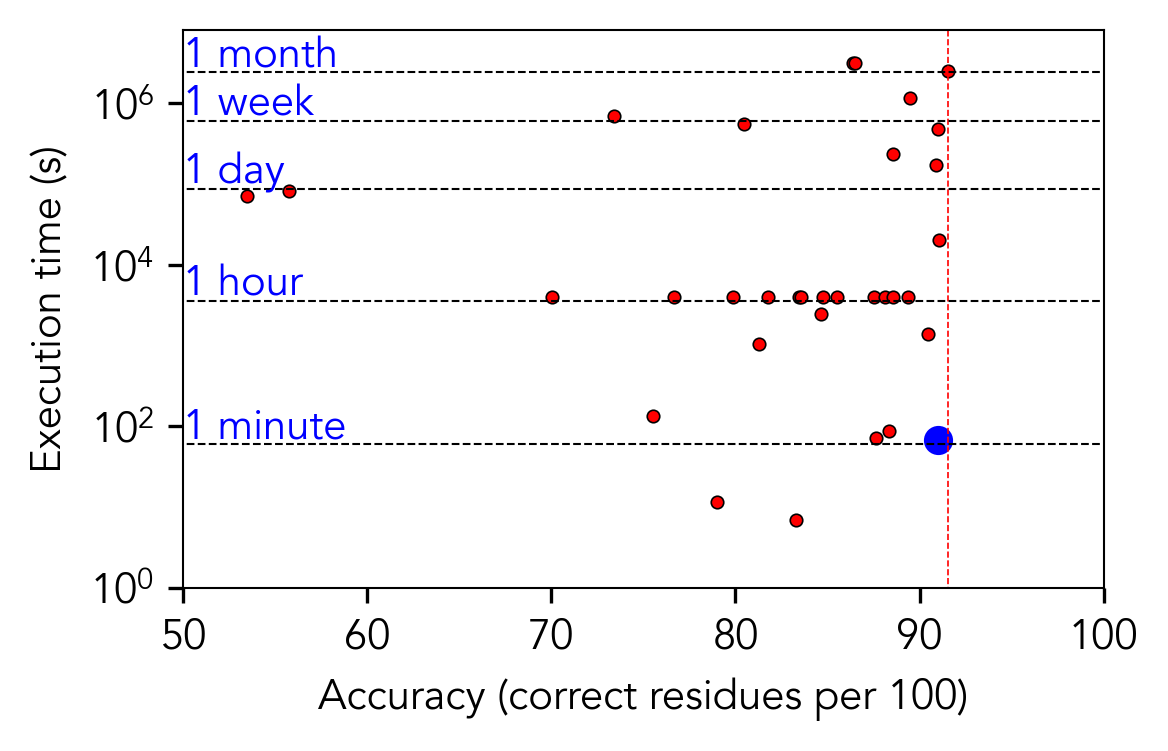

In [8]:
figure(num=None, figsize=(4, 2.6), dpi=150, facecolor='w', edgecolor='k')
ax = plt.gca()

# D029_SPOT-Disorder2 is the best scoring predictor in terms of accuracy, so we extract that out
# as the 
best_score = accuracy['D029_SPOT-Disorder2']
best_time = performance['D029_SPOT-Disorder2']
show_names = False

# hard coded here but this is calculated in accuracy/per_residue_accuracy_figure.ipynb notebook
metapredict_score = 89.27879366812228
metapredict_v2_score = 91.02449508733625

# hard coded here, but this is calculated approximately in the code shown in metapredict_on_caid_disprot/
metapredict_time = 40
metapredict_v2_time = metapredict_time*1.7 

# define human times
one_minute = 60
one_hour = one_minute *60
one_day = one_hour*24
one_week = one_day*7
one_month = one_week*4

for i in range(len(names)):
    plt.semilogy(x[i],y[i],'o', mfc='r',mec='k', ms=3, mew=0.4, label=names[i])
    
    if show_names:
        plt.text(x[i],y[i], names[i], fontsize=5)
   
    
#plt.plot(metapredict_score, metapredict_time,'ok')
plt.plot(metapredict_v2_score, metapredict_v2_time,'ob')

plt.plot([best_score, best_score], [0,10000000],'--r', linewidth=0.4)

plt.plot([0,100],[one_minute]*2,'--k',linewidth=0.5)
plt.plot([0,100],[one_hour]*2,'--k',linewidth=0.5)
plt.plot([0,100],[one_day]*2,'--k',linewidth=0.5)
plt.plot([0,100],[one_week]*2,'--k',linewidth=0.5)
plt.plot([0,100],[one_month]*2,'--k',linewidth=0.5)

plt.text(50, one_minute+10, '1 minute', color='blue')
plt.text(50, one_hour+10*one_minute, '1 hour', color='blue')
plt.text(50, one_day+4*one_hour, '1 day', color='blue')
plt.text(50, one_week+1*one_day, '1 week', color='blue')
plt.text(50, one_month+0.5*one_week, '1 month', color='blue')

plt.xlim([50,100])
plt.ylim([1,8000000])
plt.xlabel('Accuracy (correct residues per 100)')
plt.ylabel('Execution time (s)')
plt.tight_layout()
#plt.savefig('figures/performance_figure.pdf')

In [16]:
best_time/40

62282.030736697816